In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("./Data/ex1data1.csv")
data.head()

,Sq. Ft,Price
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


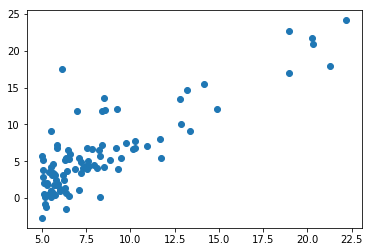

In [3]:
plt.scatter(data['Sq. Ft'],data['Price'])

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data['Sq. Ft'], data['Price'], test_size=0.2, random_state=101)

In [6]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [7]:
X_train = X_train.reshape(X_train.shape[0],1)
X_test = X_test.reshape(X_test.shape[0],1)

y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

In [8]:
print("Train Details :\n******************************\n")

print("Train Data :\n==================================")
print("Shape of X_train : %s"%str(X_train.shape))
print("Shape of y_train : %s"%str(y_train.shape))

print("Test Data :\n==================================")
print("Shape of X_test : %s"%str(X_test.shape))
print("Shape of y_test : %s"%str(y_test.shape))

Train Details :
******************************

Train Data :
Shape of X_train : (77, 1)
Shape of y_train : (77, 1)
Test Data :
Shape of X_test : (20, 1)
Shape of y_test : (20, 1)


<h1>Model 1 : LModel</h1>

In [9]:
def hypothesis(X,theta):
    return np.dot(X,theta)

In [126]:
def costfunction(X,y,theta):
    m = X.shape[0]
    cost = (1/(2*m)) * np.dot((hypothesis(X,theta) - y).T,(hypothesis(X,theta) - y))
    return cost[0][0]

In [127]:
def updateParameter(X,y,theta,alpha):
    m = X.shape[0]
    hypo = hypothesis(X,theta=theta)
    theta = theta - (alpha / m) * np.dot((hypo-y).T , X).T
    return theta

In [12]:
def model1(X,y,alpha=0.0005,iteration=10000,print_details=False):
    theta = np.zeros((X.shape[1], 1))
    loss = []
    if print_details:
            print("Loss for train Data is on %d iteratin is : %f"%(0,costfunction(X,y,theta)))
    for itr in range(1,iteration+1):
        theta = updateParameter(X,y,theta,alpha)
        loss.append(costfunction(X,y,theta))
        if print_details and itr%1000==0:
            print("Loss for train Data is on %d iteratin is : %f"%(itr,costfunction(X,y,theta)))
    return theta,loss

In [48]:
X_train = np.insert(X_train,0,1,axis=1)
X_test = np.insert(X_test,0,1,axis=1)

In [49]:
print("Train Details :\n******************************\n")

print("Train Data :\n==================================")
print("Shape of X_train : %s"%str(X_train.shape))
print("Shape of y_train : %s"%str(y_train.shape))

print("Test Data :\n==================================")
print("Shape of X_test : %s"%str(X_test.shape))
print("Shape of y_test : %s"%str(y_test.shape))

Train Details :
******************************

Train Data :
Shape of X_train : (77, 2)
Shape of y_train : (77, 1)
Test Data :
Shape of X_test : (20, 2)
Shape of y_test : (20, 1)


In [15]:
theta , loss = model1(X_train,y_train,iteration=100000,alpha=0.0005)

In [16]:
theta

array([[-3.89590399],
       [ 1.195241  ]])

Text(0, 0.5, 'Loss')

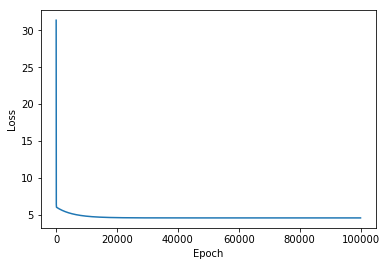

In [17]:
plt.plot(loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")

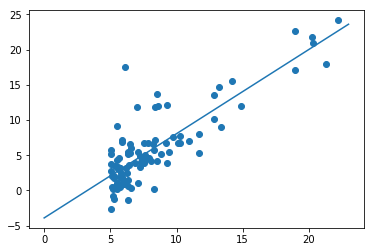

In [18]:
a = np.linspace(0,23).reshape(50,1)
a = np.insert(a,0,1,axis=1)
y = hypothesis(a,theta)

plt.scatter(data['Sq. Ft'],data['Price'])
plt.plot(np.linspace(0,23).reshape(50,1) , y)

In [19]:
def error(X,y,theta):
    hypo = hypothesis(X,theta)
    return np.mean(np.abs(hypo - y))

In [20]:
error(X_train,y_train,theta)

2.243375745377919

In [21]:
y_test[:5]

array([[4.9981],
       [4.3483],
       [3.9624],
       [5.3048],
       [6.7526]])

In [22]:
hypothesis(X_test[:5],theta)

array([[5.1916329 ],
       [5.04019586],
       [7.23202882],
       [3.71228311],
       [8.3840021 ]])

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
modelLR = LinearRegression()

In [25]:
modelLR.fit(X_train[:,1].reshape(X_train.shape[0],1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
modelLR.intercept_

array([-3.89628476])

In [27]:
modelLR.coef_[0,0]

1.1952785557823606

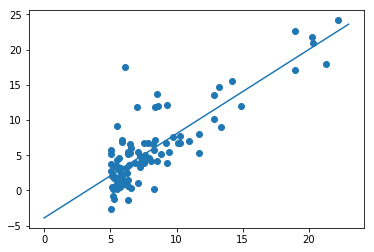

In [28]:
plt.scatter(data['Sq. Ft'],data['Price'])
plt.plot(np.linspace(0,23),(np.linspace(0,23)*modelLR.coef_[0,0]) + modelLR.intercept_[0])

Text(0, 0.5, 'Price')

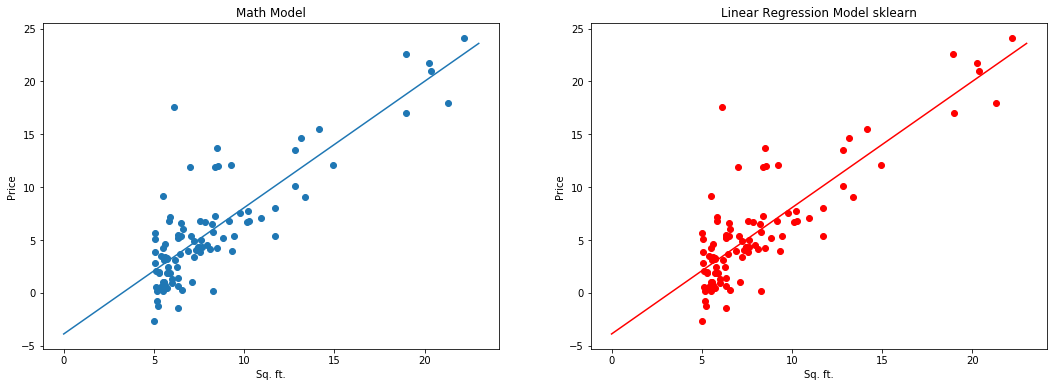

In [29]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
a = np.linspace(0,23).reshape(50,1)
a = np.insert(a,0,1,axis=1)
y = hypothesis(a,theta)

ax1.scatter(data['Sq. Ft'],data['Price'])
ax1.plot(np.linspace(0,23).reshape(50,1) , y)
ax1.set_title("Math Model")
ax1.set_xlabel("Sq. ft.")
ax1.set_ylabel("Price")

ax2.scatter(data['Sq. Ft'],data['Price'],color="red")
ax2.plot(np.linspace(0,23),(np.linspace(0,23)*modelLR.coef_[0,0]) + modelLR.intercept_[0],color="red")
ax2.set_title("Linear Regression Model sklearn")
ax2.set_xlabel("Sq. ft.")
ax2.set_ylabel("Price")

In [30]:
modelLR.score(X_train[:,1].reshape(X_train.shape[0],1),y_train)

0.7103039544174121

In [31]:
modelLR.score(X_test[:,1].reshape(X_test.shape[0],1),y_test)

0.6550860246011561

<h1>Non Linear Model</h1>

In [38]:
def initialise_parameter(X):
    return np.zeros((X.shape[1],1))

In [50]:
X_train = X_train[:,1]
X_train = X_train.reshape(X_train.shape[0],1)
X_test  = X_test[:,1]
X_test  = X_test.reshape(X_test.shape[0],1)

In [51]:
print("Data Details :\n******************************\n")

print("Train Data :\n==================================")
print("Shape of X_train : %s"%str(X_train.shape))
print("Shape of y_train : %s"%str(y_train.shape))

print("\nTest Data :\n==================================")
print("Shape of X_test : %s"%str(X_test.shape))
print("Shape of y_test : %s"%str(y_test.shape))

Data Details :
******************************

Train Data :
Shape of X_train : (77, 1)
Shape of y_train : (77, 1)

Test Data :
Shape of X_test : (20, 1)
Shape of y_test : (20, 1)


In [39]:
initialise_parameter(X_train)

array([[0.],
       [0.]])

In [118]:
def create_input_data(X,deg):
    X_train = np.insert(X,0,1,axis=1)
    for i in range(2,deg+1):
        X_train = np.insert(X_train,X_train.shape[1],X[:1]**i,axis=1)
    return X_train

'\ndef create_input_data(X,deg):\n    X_train = np.insert(X,0,1,axis=1)\n    for i in range(2,deg+1):\n        X_train = np.insert(X_train,X_train.shape[1],X[:1]**i,axis=1)\n    return X_train\n'

In [117]:
"""
def costfunction(X,y,theta,lamda):
    m = X.shape[0]
    cost = (1/(2*m)) * np.dot((hypothesis(X,theta) - y).T,(hypothesis(X,theta) - y)) + (lamda / (2 * m)) * np.dot(theta.T,theta)
    return cost[0][0]
    """

'\ndef costfunction(X,y,theta,lamda):\n    m = X.shape[0]\n    cost = (1/(2*m)) * np.dot((hypothesis(X,theta) - y).T,(hypothesis(X,theta) - y)) + (lamda / (2 * m)) * np.dot(theta.T,theta)\n    return cost[0][0]\n    '

In [121]:
"""
def updateParameter(X,y,theta,alpha,lamda):
    m = X.shape[0]
    hypo = hypothesis(X,theta=theta)
    theta = theta - (alpha / m) * np.dot((hypo-y).T , X).T + (lamda / m) * theta
    return theta
"""

'\ndef updateParameter(X,y,theta,alpha,lamda):\n    m = X.shape[0]\n    hypo = hypothesis(X,theta=theta)\n    theta = theta - (alpha / m) * np.dot((hypo-y).T , X).T + (lamda / m) * theta\n    return theta\n'

In [128]:
def modelNL(X,y,max_deg = 5,alpha=0.0005,lamda=0.0005,iteration=10000,print_details=False):
    
    Theta = {}
    loss = {}
    
    for deg in range(1,1+max_deg):
        X_train = create_input_data(X,deg)
        theta = initialise_parameter(X_train)
        if print_details and it%100==0:
                print("Loss in %dth iteration is : %.4f"%(0,costfunction(X_train,y,theta)))
        for it in range(iteration):
            theta = updateParameter(X_train,y,theta,alpha)
            if print_details and it%100==0:
                print("Loss in %dth iteration is : %.4f"%(it,costfunction(X_train,y,theta)))
        print(theta)
        Theta[str(deg)] = theta
        loss[str(deg)]  = costfunction(X_train,y,theta)
    return Theta,loss

In [129]:
theta,loss = modelNL(X_train,y_train,max_deg=3,iteration=100000)

[[-3.89590399]
 [ 1.195241  ]]


C:\Users\ANKIT PODDER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.


[[nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]


In [130]:
loss

{'1': 4.571934325340278, '2': nan, '3': nan}

In [131]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)

In [132]:
X_poly = poly.fit_transform(X_train)

In [133]:
modelNLSKL = LinearRegression()
modelNLSKL.fit(X_poly,y_train.reshape(y_train.shape[0]))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [134]:
modelNLSKL.intercept_

-6.7407026623870685

In [135]:
modelNLSKL.coef_

array([ 0.00000000e+00,  2.02915943e+00, -7.13735284e-02,  1.81020302e-03])

In [136]:
modelNLSKL.score(X_poly,y_train.reshape(y_train.shape[0]))

0.7110716281586227

In [143]:
from inspect import getsource
print(getsource(LinearRegression))

class LinearRegression(LinearModel, RegressorMixin):
    """
    Ordinary least squares Linear Regression.

    Parameters
    ----------
    fit_intercept : boolean, optional, default True
        whether to calculate the intercept for this model. If set
        to False, no intercept will be used in calculations
        (e.g. data is expected to be already centered).

    normalize : boolean, optional, default False
        This parameter is ignored when ``fit_intercept`` is set to False.
        If True, the regressors X will be normalized before regression by
        subtracting the mean and dividing by the l2-norm.
        If you wish to standardize, please use
        :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
        an estimator with ``normalize=False``.

    copy_X : boolean, optional, default True
        If True, X will be copied; else, it may be overwritten.

    n_jobs : int or None, optional (default=None)
        The number of jobs to use for

In [145]:
from sklearn import linear_model

In [147]:
print(getsource(linear_model))

"""
The :mod:`sklearn.linear_model` module implements generalized linear models. It
includes Ridge regression, Bayesian Regression, Lasso and Elastic Net
estimators computed with Least Angle Regression and coordinate descent. It also
implements Stochastic Gradient Descent related algorithms.
"""

# See http://scikit-learn.sourceforge.net/modules/sgd.html and
# http://scikit-learn.sourceforge.net/modules/linear_model.html for
# complete documentation.

from .base import LinearRegression

from .bayes import BayesianRidge, ARDRegression
from .least_angle import (Lars, LassoLars, lars_path, LarsCV, LassoLarsCV,
                          LassoLarsIC)
from .coordinate_descent import (Lasso, ElasticNet, LassoCV, ElasticNetCV,
                                 lasso_path, enet_path, MultiTaskLasso,
                                 MultiTaskElasticNet, MultiTaskElasticNetCV,
                                 MultiTaskLassoCV)
from .huber import HuberRegressor
from .sgd_fast import Hinge, Log, Mod